# Libraries and Data Preparation

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from scipy import stats
print("Libraries Imported")
#Lets import and check the dataset
#Attaching google drive
from google.colab import drive
drive.mount('/content/gdrive')

Libraries Imported
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Variables
base_loc = '/content/gdrive/My Drive/upgrad/research/data/'
data_loc = base_loc + 'data.csv'
cluster2_loc = base_loc + 'cluster2.csv'
cluster4_loc = base_loc + 'cluster4.csv'

In [0]:
#Gameplay data
data = pd.read_csv(data_loc)
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.000000,0.201402,0.

In [0]:
#Bringing forever average into a two week scale
#data.forever_avg = data.forever_avg*14
#data.forever_avg

In [0]:
data.count()[1]

60358

In [0]:
# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA 

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [0]:
columns_list = data.columns.values

Genre_columns = []
for x in columns_list:
  if 'Genre' in x and 'deviation' not in x:
    Genre_columns.append(x)

Playtime_2weeks_bygenre_columns = []
for x in columns_list:
  if 'Playtime_2weeks_bygenre' in x and 'deviation' not in x:
    Playtime_2weeks_bygenre_columns.append(x)

Playtime_forever_bygenre_columns = []
for x in columns_list:
  if 'Playtime_forever_bygenre' in x and 'deviation' not in x:
    Playtime_forever_bygenre_columns.append(x)

In [0]:
drop_list = ['steamid','playtime_forever','Price','commentpermission','free_to_play','Is_Multiplayer', 'Is_Adult', 'unplayed',
                            'total_achievements','Playtime_forever_total' ,'Playtime_2weeks_total' , 'Genre_total'
                            ,'playtime_age' , 'Type_demo', 'Type_dlc', 'Type_game', 'Type_mod', 'Type_Unknown'
                            ] + Genre_columns + Playtime_2weeks_bygenre_columns + Playtime_forever_bygenre_columns
drop_list

['steamid',
 'playtime_forever',
 'Price',
 'commentpermission',
 'free_to_play',
 'Is_Multiplayer',
 'Is_Adult',
 'unplayed',
 'total_achievements',
 'Playtime_forever_total',
 'Playtime_2weeks_total',
 'Genre_total',
 'playtime_age',
 'Type_demo',
 'Type_dlc',
 'Type_game',
 'Type_mod',
 'Type_Unknown',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Casual',
 'Genre_Early',
 'Genre_Free',
 'Genre_Indie',
 'Genre_Massively_Multiplayer',
 'Genre_RPG',
 'Genre_Racing',
 'Genre_Simulation',
 'Genre_Sports',
 'Genre_Strategy',
 'Genre_Unknown',
 'Genre_total',
 'Playtime_2weeks_bygenre_Action',
 'Playtime_2weeks_bygenre_Adventure',
 'Playtime_2weeks_bygenre_Casual',
 'Playtime_2weeks_bygenre_Early',
 'Playtime_2weeks_bygenre_Free',
 'Playtime_2weeks_bygenre_Indie',
 'Playtime_2weeks_bygenre_Massively_Multiplayer',
 'Playtime_2weeks_bygenre_RPG',
 'Playtime_2weeks_bygenre_Racing',
 'Playtime_2weeks_bygenre_Simulation',
 'Playtime_2weeks_bygenre_Sports',
 'Playtime_2weeks_bygenre_Strategy',
 

In [0]:
data_for_scale = data.drop(drop_list,axis=1)

standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(data_for_scale)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = data_for_scale.columns
scaled_data.head()

,realname,playtime_2weeks,no_of_games,Rating,Required_Age,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,loggoff_duration,account_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage
0,0.888149,-0.652082,2.330124,-0.829897,-0.219972,0.409371,0.408958,0.325237,-0.529263,-0.470999,0.235216,-1.844016,2.419877,1.204457,0.617154,-0.627365,-0.319998,-0.732272,-0.199726,0.327473
1,0.888149,-0.179698,2.077523,-0.143548,0.023819,0.074562,2.125387,-0.170612,-0.654697,1.608397,2.280303,-1.844016,2.419877,-0.237131,0.808139,-0.496444,-0.336904,-0.353466,-0.174298,0.088683
2,-1.125937,2.347738,0.009356,0.436835,-0.850752,0.972606,-0.449256,2.145825,0.151135,-0.802736,-0.917865,-1.326860,2.419877,1.204457,-0.433403,-0.082632,-0.061042,0.036336,-0.527105,1.180182
3,0.888149,0.736679,-0.858958,1.721069,0.308669,2.185175,0.730789,-0.047366,0.335909,-0.553541,1.497079,-1.299641,2.419877,-0.756256,-0.903361,0.722129,0.269350,1.155356,-0.527105,0.636882
4,0.888149,1.203627,1.777560,-0.288994,-0.625371,0.255113,-0.556533,-1.112470,-0.976283,-0.101474,-0.134640,-1.326860,2.419877,-0.336545,0.344404,-0.275292,-0.403802,-0.574863,-0.527105,0.798751


In [0]:
#scaled_data.isna().sum()

# Choosing K

In [0]:
# sum of squared distances
#"""
ssd = []
for num_clusters in range(1,21):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(scaled_data)
    ssd.append(model_clus.inertia_)

#"""

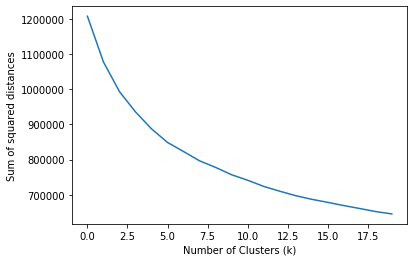

In [0]:
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared distances')
plt.plot(ssd)
#2 looks ok


In [0]:
round(ssd[0]-ssd[1]) #200179.0
round(ssd[1]-ssd[2]) #105711.0
round(ssd[2]-ssd[3]) #73947.0
round(ssd[3]-ssd[4]) # 53419.0

48121.0

# Using 2 Clusters

In [0]:
# Kmeans with K=2
model_clus = KMeans(n_clusters = 2, max_iter=50)
model_clus.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pd.unique(model_clus.labels_)

array([0, 1])

In [0]:
# analysis of clusters formed
data.index = pd.RangeIndex(len(data.index))
data_km = pd.concat([data, pd.Series(model_clus.labels_)], axis=1)
data_km.head()

columns = data_km.columns[:-1].values
columns = list(columns)+['ClusterID']
data_km.columns = columns

data_km.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394,0
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369,0
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121,1
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.00

In [0]:
#Count of Clusters
data_km.loc[:,['ClusterID','steamid']].groupby(['ClusterID']).count()

#19009 cluster 0
#41349 cluster 1

,steamid
ClusterID,
0,22192
1,38166


In [0]:
#Write to file
data_km.to_csv(cluster2_loc,index=False)

In [0]:
pd.unique(data_km.ClusterID)
len(data_km.columns) #78
data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2].values

array(['commentpermission', 'realname', 'playtime_2weeks',
       'playtime_forever', 'no_of_games', 'free_to_play', 'Price',
       'Rating', 'Required_Age', 'Is_Multiplayer', 'Is_Adult', 'unplayed',
       'game_age', 'no_of_groups', 'avg_friend_duration',
       'avg_percentage_completion', 'total_group_connections',
       'total_friend_connections', 'total_achievements',
       'loggoff_duration', 'account_age', 'Genre_Action',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Early', 'Genre_Free',
       'Genre_Indie', 'Genre_Massively_Multiplayer', 'Genre_RPG',
       'Genre_Racing', 'Genre_Simulation', 'Genre_Sports',
       'Genre_Strategy', 'Genre_Unknown',
       'Playtime_2weeks_bygenre_Action',
       'Playtime_2weeks_bygenre_Adventure',
       'Playtime_2weeks_bygenre_Casual', 'Playtime_2weeks_bygenre_Early',
       'Playtime_2weeks_bygenre_Free', 'Playtime_2weeks_bygenre_Indie',
       'Playtime_2weeks_bygenre_Massively_Multiplayer',
       'Playtime_2weeks_bygenre_RPG', 

In [0]:
cluster_means = pd.DataFrame()

for columns in data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2]:
  a = pd.DataFrame(data_km.groupby(["ClusterID"])[columns].mean())
  cluster_means = pd.concat([cluster_means,a],axis=1)

cluster_means.reset_index(level=0, inplace=True)
cluster_means.head()

,ClusterID,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,0,0.0,0.726613,6895.791637,174673.138992,133.410463,5.071828,1773.631934,78.590531,4.254661,53.429119,0.960549,45.610896,3716.777518,14.200027,416.765920,14.284000,1.796843e+06,68.512031,7527.327596,117.831471,1543.859229,0.362191,0.103207,0.043331,0.000452,0.012264,0.153763,0.001679,0.092675,0.008867,0.035880,0.007681,0.123552,0.05446,0.333365,0.054999,0.012009,0.000298,0.134142,0.103496,0.013180,0.123938,0.003969,0.001079,0.003990,0.187520,0.028015,0.392321,0.053419,0.010496,0.000111,0.143339,0.090120,0.008487,0.120552,0.003179,0.000051,0.002905,0.148121,0.02690,0.000888,0.004547,1.011331,0.003695,0.094648,1232.555335,147.811402,1.597294,58.010844,0.044035,0.422080,0.007175,0.334978,330108.845755,14924.595665,270.122026
1,1,0.0,0.461589,6808.314416,113027.445940,40.099434,2.262275,566.441844,80.088563,4.488440,19.540769,0.332482,11.585600,3732.864753,4.691964,324.657841,14.524801,3.943484e+05,34.789813,2557.660090,135.095556,1283.870395,0.423530,0.076687,0.017535,0.000313,0.035797,0.091750,0.003474,0.092317,0.005973,0.043761,0.004813,0.140782,0.06327,0.330164,0.038417,0.005098,0.000246,0.134284,0.081156,0.010919,0.121479,0.002746,0.001251,0.003101,0.228033,0.043105,0.377764,0.041416,0.004808,0.000139,0.135214,0.070395,0.007928,0.115897,0.002279,0.000079,0.002145,0.201684,0.04025,0.000501,0.003339,0.897383,0.004882,0.093894,1070.037494,115.080928,0.585916,67.793393,0.089566,0.545922,0.007298,0.264781,205787.668448,14074.980244,65.173610


In [0]:
data_km[data_km.steamid.isin(['76561197960275312','76561197960269752'])]
#data_km[data_km.steamid.isin(['76561197960269425','76561197960269752'])]
#data_km[data_km.steamid.isin(['76561197961805932','76561197960270328'])]
#data_km[data_km.steamid.isin(['76561197960327533','76561197960278199'])]

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
3,76561197960269752,0.0,1,8060.0,102719.0,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.018863,0.000000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.000000,0.201402,0.000000,0.0,0.000000,1.000000,0.0,0.000000,1586,64.766078,0.166974,77.80,0.100000,0.700000,0.000000,0.400000,180693.0,8376.0,27,1
17,76561197960275312,0.0,0,5947.0,196950.0,225.0,11.0,3052.89,74.390528,1.923913,90.5,2.5,80.0,3462.796584,5.0,415.272727,13.854255,10852.0,11.0,12654.0,80.0,3334.5,0.232639,0.118056,0.097718,0.000992,0.002480,0.152778,0.001488,0.064980,0.028274,0.054067,0.012401,0.128968,0.105159,0.474893,0.453243,0.008232,0.0,0.000000,0.021403,0.0,0.008479,0.00107,0.008973,0.008232,0.009055,0.006421,0.456436,0.046937,0.071673,0.000144,0.010783,0.037704,0.010657,0.260880,0.004915,0.000383,0.003208,0.081124,0.015157,0.0,0.035556,4.791111,0.0,0.897778,1586,124.180328,1.924899,56.24,0.048889,0.402222,0.011111,0.355556,284614.0,12148.0,2016,0


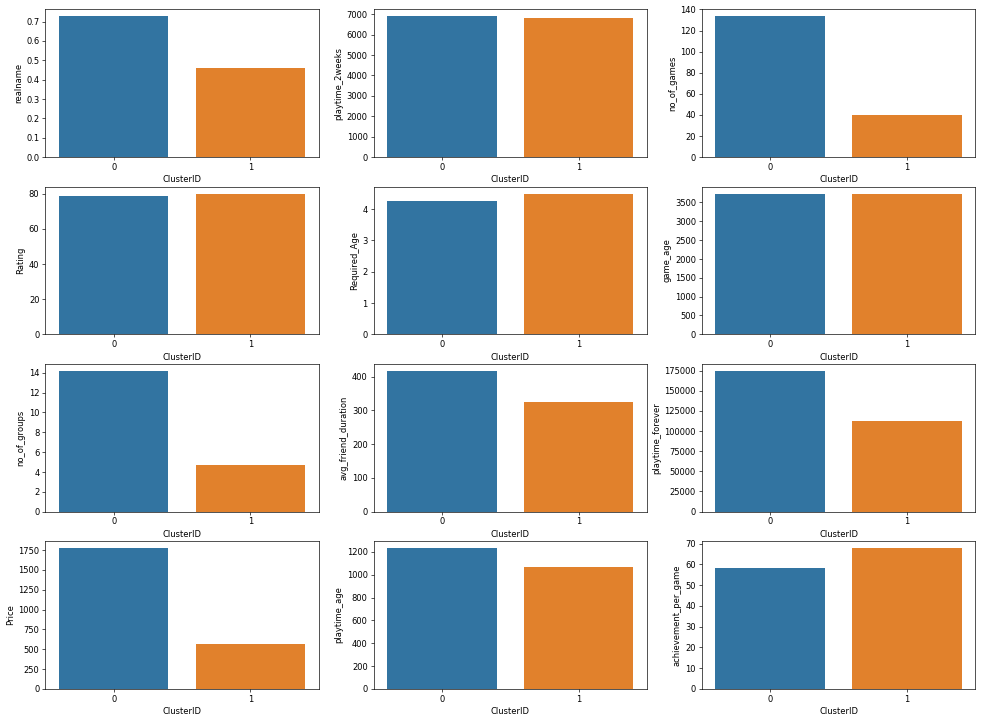

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'realname',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'playtime_2weeks',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'no_of_games',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Rating',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Required_Age',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'game_age',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'no_of_groups',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'avg_friend_duration',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'playtime_forever',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Price',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'playtime_age',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'achievement_per_game',data=cluster_means)

plt.show()

#We can see differences in no of games and hence Price

In [0]:
'''
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)
'''

"\nfrom matplotlib.pyplot import figure\nfigure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')\n\nplt.subplot(3, 3, 1)\nsns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 2)\nsns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 3)\nsns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)\n"

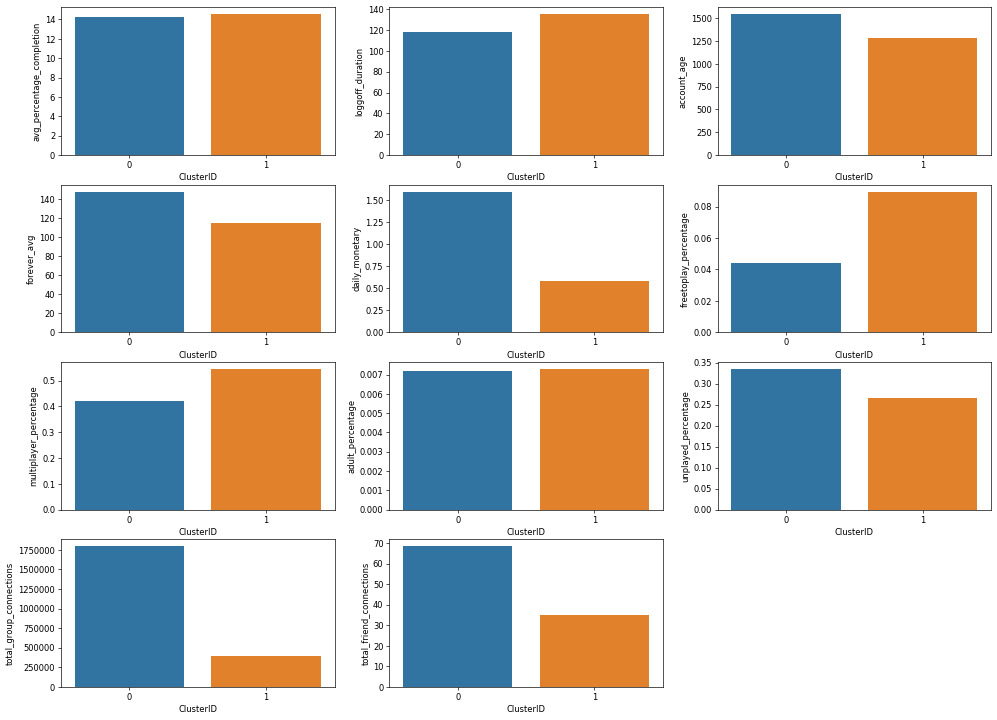

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4,3, 1)
sns.barplot('ClusterID', 'avg_percentage_completion',data=cluster_means)

plt.subplot(4,3, 2)
sns.barplot('ClusterID', 'loggoff_duration',data=cluster_means)

plt.subplot(4,3, 3)
sns.barplot('ClusterID', 'account_age',data=cluster_means)

plt.subplot(4,3, 4)
sns.barplot('ClusterID', 'forever_avg',data=cluster_means)

plt.subplot(4,3, 5)
sns.barplot('ClusterID', 'daily_monetary',data=cluster_means)

plt.subplot(4,3, 6)
sns.barplot('ClusterID', 'freetoplay_percentage',data=cluster_means)

plt.subplot(4,3, 7)
sns.barplot('ClusterID', 'multiplayer_percentage',data=cluster_means)

plt.subplot(4,3, 8)
sns.barplot('ClusterID', 'adult_percentage',data=cluster_means)

plt.subplot(4,3, 9)
sns.barplot('ClusterID', 'unplayed_percentage',data=cluster_means)

plt.subplot(4,3, 10)
sns.barplot('ClusterID', 'total_group_connections',data=cluster_means)

plt.subplot(4,3, 11)
sns.barplot('ClusterID', 'total_friend_connections',data=cluster_means)

plt.show()

#We can see differences in forever average, daily expenses, 
#freetoplay percentage and multiplayer percentage, adult percentage, unplayed percentage

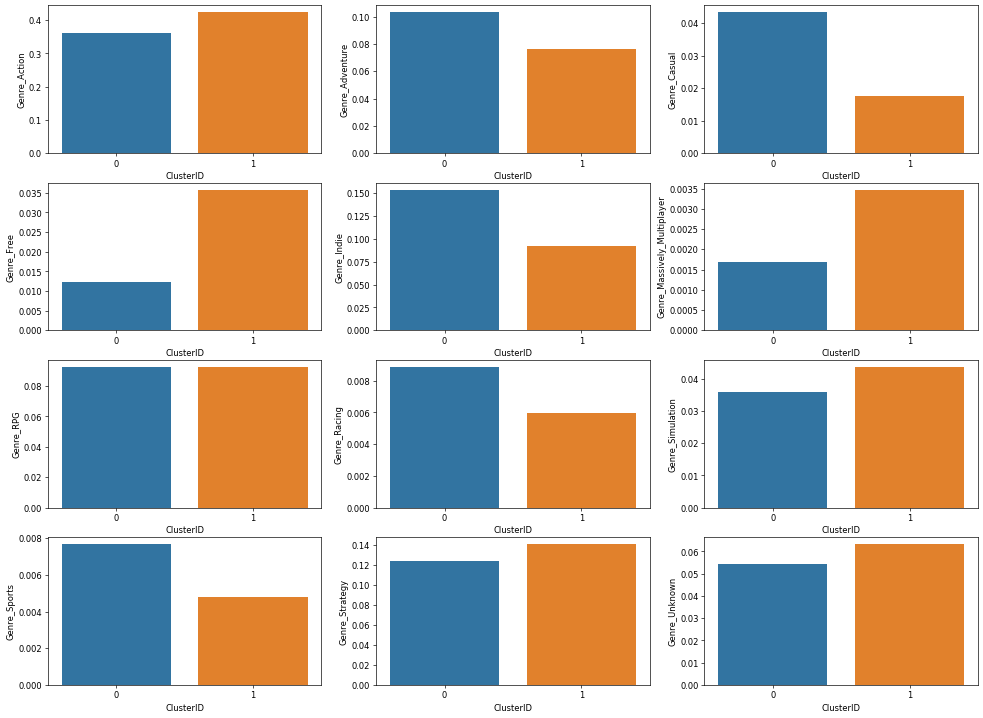

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Genre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Genre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Genre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Genre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Genre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Genre_Massively_Multiplayer',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Genre_RPG',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Genre_Racing',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Genre_Simulation',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Genre_Sports',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'Genre_Strategy',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'Genre_Unknown',data=cluster_means)

plt.show()

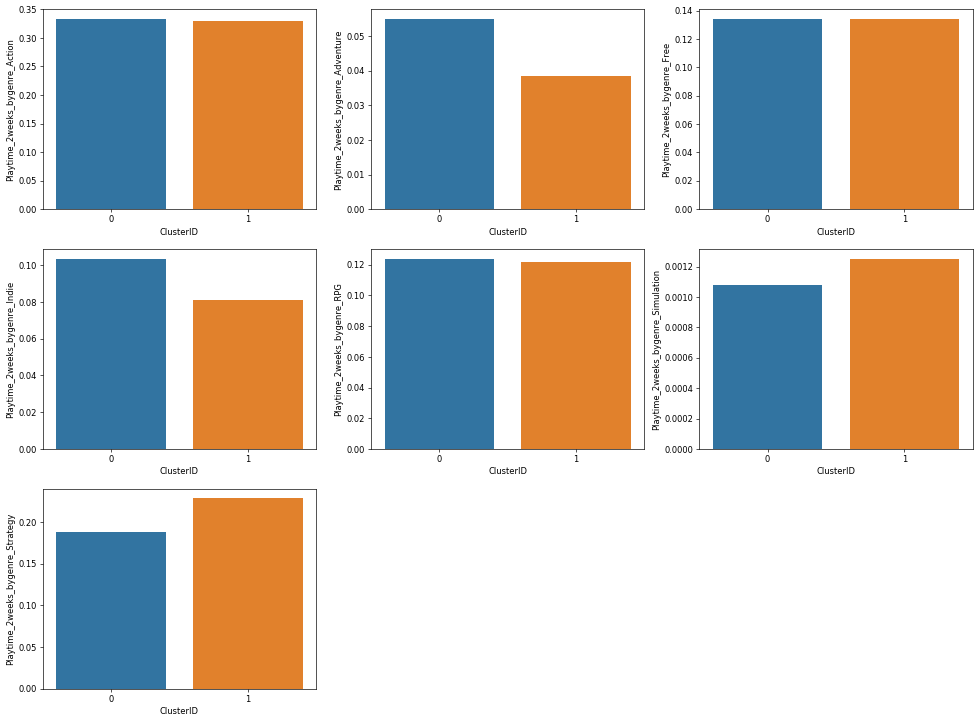

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Action',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Adventure',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Free',data=cluster_means)

plt.subplot(3, 3, 4)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Indie',data=cluster_means)

plt.subplot(3, 3, 5)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_RPG',data=cluster_means)

plt.subplot(3, 3, 6)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Simulation',data=cluster_means)

plt.subplot(3, 3, 7)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Strategy',data=cluster_means)

plt.show()

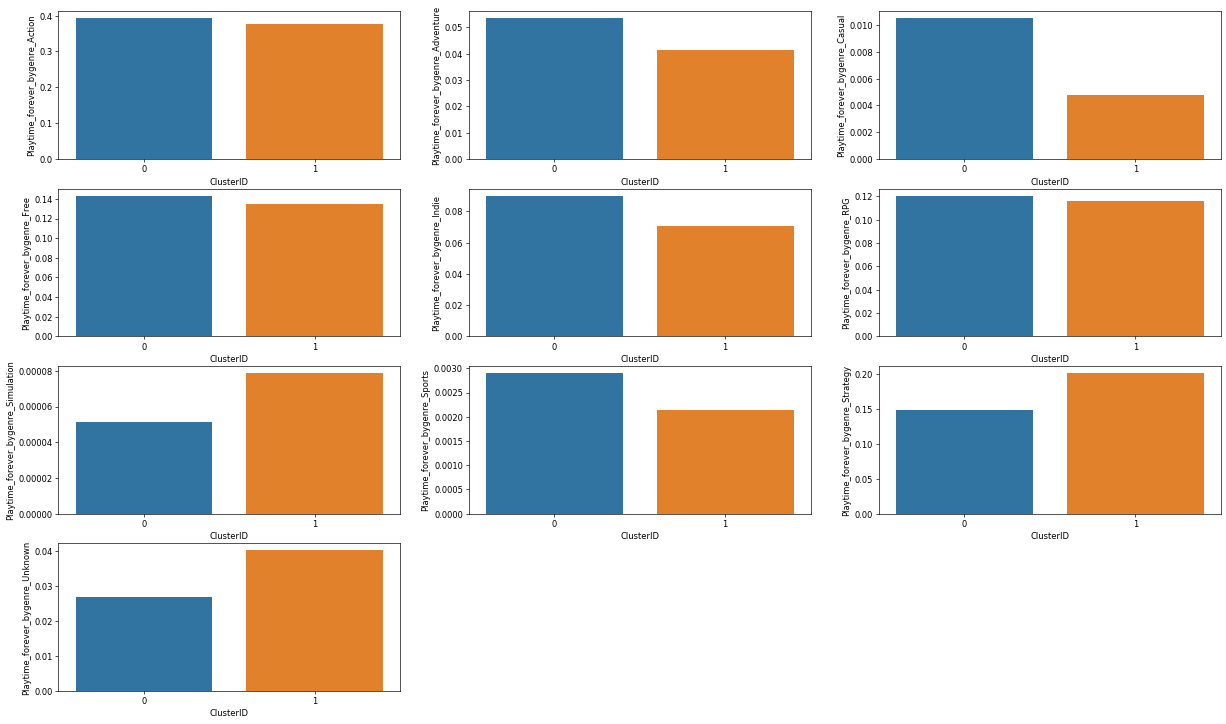

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_RPG',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Simulation',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Sports',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Strategy',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Unknown',data=cluster_means)

plt.show()

# Using 4 Clusters

In [0]:
# Kmeans with K=4
model_clus = KMeans(n_clusters = 4, max_iter=50)
model_clus.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pd.unique(model_clus.labels_)

array([1, 3, 0, 2])

In [0]:
# analysis of clusters formed
data.index = pd.RangeIndex(len(data.index))
data_km = pd.concat([data, pd.Series(model_clus.labels_)], axis=1)
data_km.head()

columns = data_km.columns[:-1].values
columns = list(columns)+['ClusterID']
data_km.columns = columns

data_km.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394,1
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369,3
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121,1
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.00

In [0]:
#Count of Clusters
data_km.loc[:,['ClusterID','steamid']].groupby(['ClusterID']).count()

,steamid
ClusterID,
0,7800
1,16522
2,21838
3,14198


In [0]:
#Write to file
data_km.to_csv(cluster4_loc,index=False)

In [0]:
pd.unique(data_km.ClusterID)
len(data_km.columns) #78
data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2].values

array(['commentpermission', 'realname', 'playtime_2weeks',
       'playtime_forever', 'no_of_games', 'free_to_play', 'Price',
       'Rating', 'Required_Age', 'Is_Multiplayer', 'Is_Adult', 'unplayed',
       'game_age', 'no_of_groups', 'avg_friend_duration',
       'avg_percentage_completion', 'total_group_connections',
       'total_friend_connections', 'total_achievements',
       'loggoff_duration', 'account_age', 'Genre_Action',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Early', 'Genre_Free',
       'Genre_Indie', 'Genre_Massively_Multiplayer', 'Genre_RPG',
       'Genre_Racing', 'Genre_Simulation', 'Genre_Sports',
       'Genre_Strategy', 'Genre_Unknown',
       'Playtime_2weeks_bygenre_Action',
       'Playtime_2weeks_bygenre_Adventure',
       'Playtime_2weeks_bygenre_Casual', 'Playtime_2weeks_bygenre_Early',
       'Playtime_2weeks_bygenre_Free', 'Playtime_2weeks_bygenre_Indie',
       'Playtime_2weeks_bygenre_Massively_Multiplayer',
       'Playtime_2weeks_bygenre_RPG', 

In [0]:
cluster_means = pd.DataFrame()

for columns in data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2]:
  a = pd.DataFrame(data_km.groupby(["ClusterID"])[columns].mean())
  cluster_means = pd.concat([cluster_means,a],axis=1)

cluster_means.reset_index(level=0, inplace=True)
cluster_means.head()

,ClusterID,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,0,0.0,0.482821,6822.112692,112849.155176,14.151667,2.046795,171.295197,80.371090,2.230549,9.517692,0.025513,3.076282,3841.172138,8.790128,219.583695,14.193823,5.956659e+05,58.178974,1167.231923,154.639615,916.372308,0.485134,0.044746,0.010619,0.000202,0.096368,0.071240,0.004276,0.049659,0.003937,0.034223,0.005855,0.140856,0.052886,0.392724,0.010952,0.001276,0.000103,0.232255,0.076223,0.004386,0.033257,0.000594,0.000757,0.000673,0.237396,0.009403,0.439168,0.013242,0.001115,0.000055,0.231392,0.059836,0.003653,0.030137,0.000370,0.000266,0.000683,0.210790,0.009294,0.000768,0.001079,0.907466,0.006803,0.083884,871.992051,144.045952,0.217771,84.340484,0.216656,0.727942,0.001276,0.204122,229791.254359,15782.636538,23.350513
1,1,0.0,0.494250,6962.877194,155381.132551,80.175705,3.206270,1070.592883,79.690548,4.143139,35.430941,0.545576,27.743312,3920.212601,4.570905,513.255229,14.322956,5.095823e+05,35.552415,4641.420349,91.973671,2313.163509,0.428768,0.077234,0.025742,0.000282,0.016613,0.099725,0.002572,0.096491,0.006442,0.038976,0.004463,0.143378,0.059316,0.304096,0.047381,0.008858,0.000249,0.106364,0.066932,0.018969,0.141379,0.003452,0.001364,0.004351,0.231757,0.064848,0.372554,0.044754,0.008043,0.000099,0.101492,0.058747,0.012765,0.140826,0.003255,0.000029,0.002479,0.196696,0.058261,0.000542,0.004641,0.922670,0.002691,0.085860,1560.234052,99.735629,0.688322,59.839768,0.051363,0.494932,0.006302,0.347643,267315.980632,14114.026934,132.652282
2,2,0.0,0.496520,6714.221037,99026.082574,51.728318,2.372287,748.733321,79.856124,5.486138,22.810903,0.495718,15.348567,3556.594762,3.906104,276.248947,14.696562,4.161992e+05,28.281619,3191.162332,150.215450,881.522117,0.374990,0.097535,0.021724,0.000410,0.019333,0.110687,0.003305,0.107931,0.006969,0.048623,0.004964,0.136843,0.066686,0.316832,0.049904,0.005798,0.000322,0.108600,0.095068,0.010041,0.150088,0.003488,0.001373,0.003534,0.216491,0.038462,0.352605,0.055774,0.005868,0.000195,0.113741,0.085786,0.007673,0.143111,0.002620,0.000038,0.002638,0.192498,0.037454,0.000427,0.003643,0.890239,0.004995,0.100960,876.733858,119.134638,0.933365,63.840113,0.053980,0.470589,0.010158,0.262543,182654.218152,13526.855893,87.872745
3,3,0.0,0.772433,6902.327159,181729.097663,135.680448,5.504367,1803.351380,78.412550,4.230718,54.494964,0.983765,44.852867,3701.326324,18.651606,381.341049,14.300949,2.308196e+06,83.772362,7690.0655

In [0]:
#Write to file
#cluster_means.to_csv()

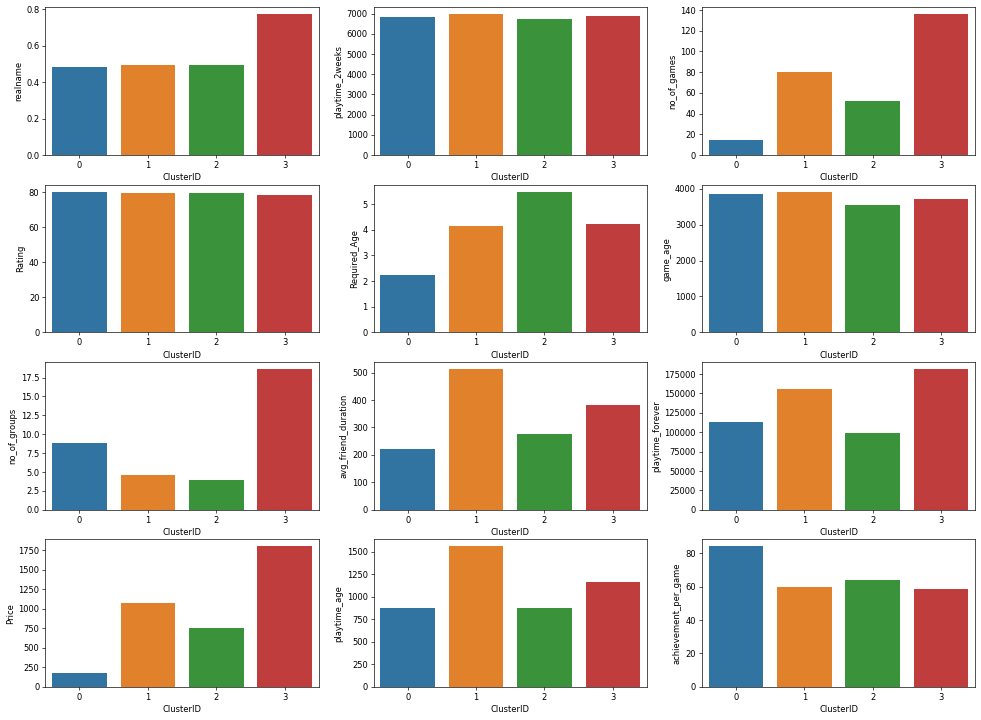

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'realname',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'playtime_2weeks',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'no_of_games',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Rating',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Required_Age',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'game_age',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'no_of_groups',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'avg_friend_duration',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'playtime_forever',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Price',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'playtime_age',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'achievement_per_game',data=cluster_means)

plt.show()

#We can see differences in no of games and hence Price

In [0]:
'''
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)
'''

"\nfrom matplotlib.pyplot import figure\nfigure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')\n\nplt.subplot(3, 3, 1)\nsns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 2)\nsns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 3)\nsns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)\n"

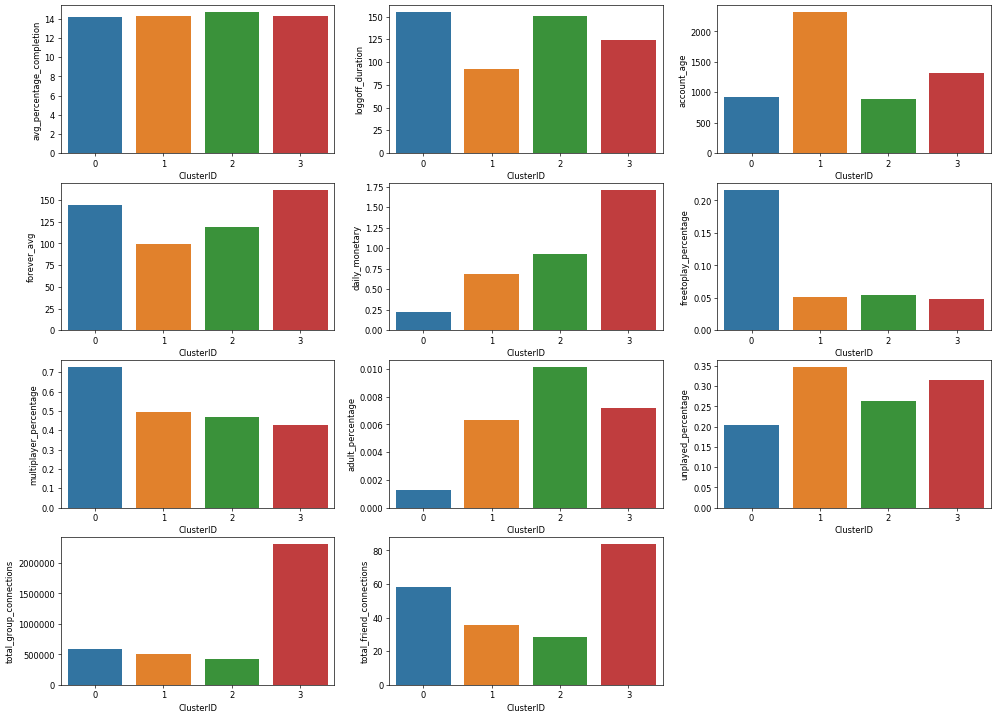

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4,3, 1)
sns.barplot('ClusterID', 'avg_percentage_completion',data=cluster_means)

plt.subplot(4,3, 2)
sns.barplot('ClusterID', 'loggoff_duration',data=cluster_means)

plt.subplot(4,3, 3)
sns.barplot('ClusterID', 'account_age',data=cluster_means)

plt.subplot(4,3, 4)
sns.barplot('ClusterID', 'forever_avg',data=cluster_means)

plt.subplot(4,3, 5)
sns.barplot('ClusterID', 'daily_monetary',data=cluster_means)

plt.subplot(4,3, 6)
sns.barplot('ClusterID', 'freetoplay_percentage',data=cluster_means)

plt.subplot(4,3, 7)
sns.barplot('ClusterID', 'multiplayer_percentage',data=cluster_means)

plt.subplot(4,3, 8)
sns.barplot('ClusterID', 'adult_percentage',data=cluster_means)

plt.subplot(4,3, 9)
sns.barplot('ClusterID', 'unplayed_percentage',data=cluster_means)

plt.subplot(4,3, 10)
sns.barplot('ClusterID', 'total_group_connections',data=cluster_means)

plt.subplot(4,3, 11)
sns.barplot('ClusterID', 'total_friend_connections',data=cluster_means)

plt.show()

#We can see differences in forever average, daily expenses, 
#freetoplay percentage and multiplayer percentage, adult percentage, unplayed percentage

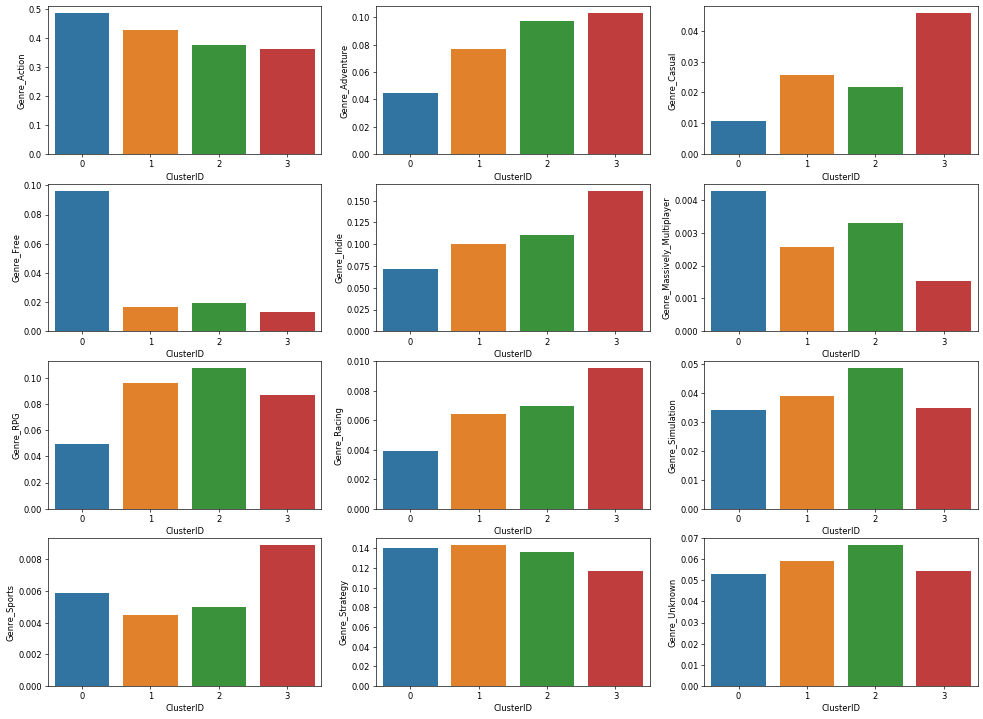

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Genre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Genre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Genre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Genre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Genre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Genre_Massively_Multiplayer',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Genre_RPG',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Genre_Racing',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Genre_Simulation',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Genre_Sports',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'Genre_Strategy',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'Genre_Unknown',data=cluster_means)

plt.show()

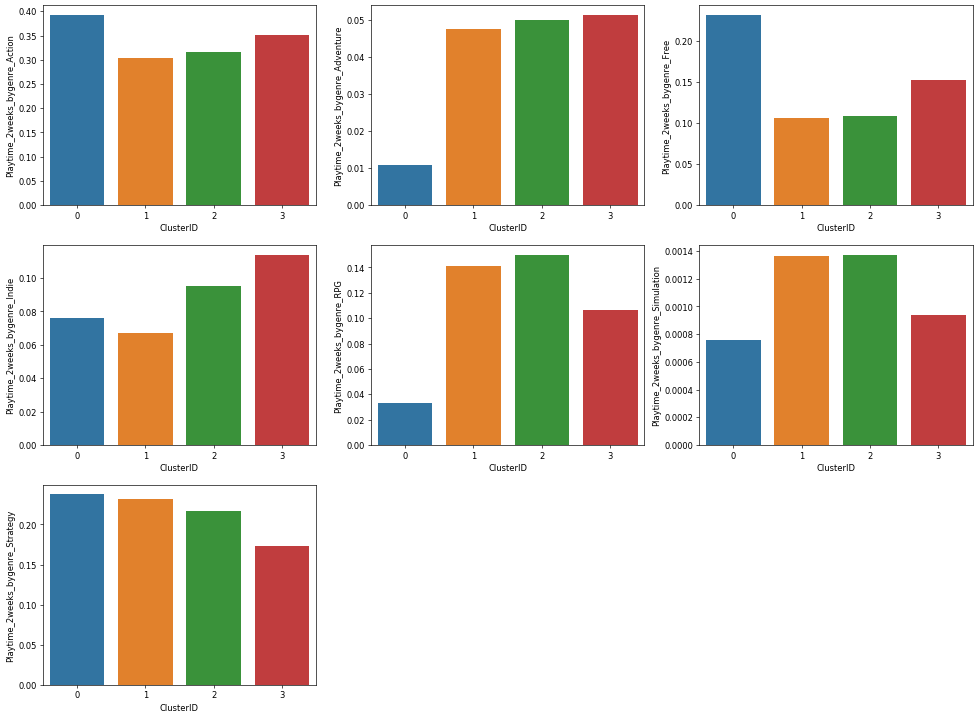

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Action',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Adventure',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Free',data=cluster_means)

plt.subplot(3, 3, 4)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Indie',data=cluster_means)

plt.subplot(3, 3, 5)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_RPG',data=cluster_means)

plt.subplot(3, 3, 6)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Simulation',data=cluster_means)

plt.subplot(3, 3, 7)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Strategy',data=cluster_means)

plt.show()

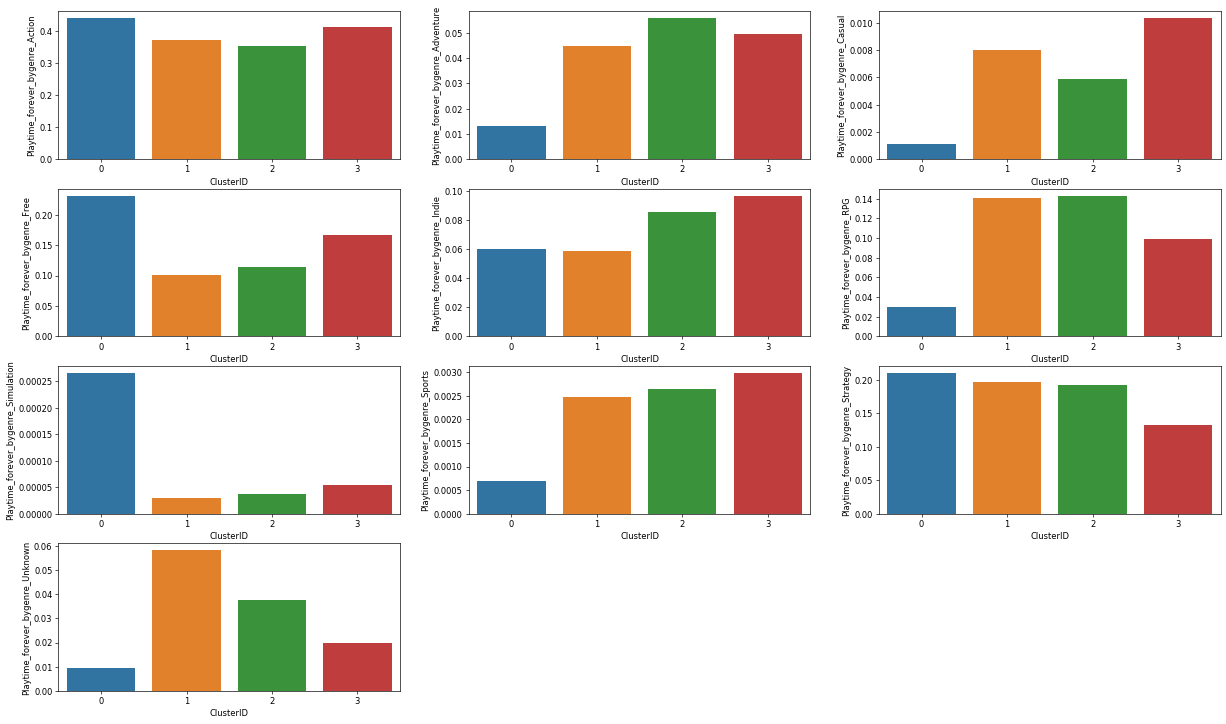

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_RPG',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Simulation',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Sports',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Strategy',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Unknown',data=cluster_means)

plt.show()